In [75]:
import pandas as pd
import re

In [76]:

import numpy as np 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

pd.set_option('display.width', 1000)

In [71]:
final_df = pd.read_csv('./final_df.csv',low_memory=False)
final_df = final_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [73]:
def search(df = final_df, text = None,columns = ['Continent', 'Country', 'Region', 'Cultural Group', 'Local name', 'Keywords for printouts', 'Class for printouts', 'Processes for printouts', 'Materials for printouts', 'Date made', 'Field Collector', 'When collected', 'PRM Source', 'Acquired'], incomplete_columns=['PRM Source', 'Description', 'Research notes', 'Publications history', 'Primary documentation']):
    text = re.findall(r'(\w+)',text)
    c=0
    
    for i in columns:
       # print(i)
        if c==0:
            if len(df[df[i].str.contains('|'.join(text))==True])>0:
             #   print(len(df[df[i].str.contains('|'.join(text))==True]))
                appa = df[df[i].str.contains('|'.join(text))==True]
                c+=1
            else:
                pass
        else:
            appa.append(df[df[i].str.contains('|'.join(text))==True])
    
    appa['ALL']= ''
    for i in incomplete_columns:
        appa['ALL']= appa['ALL'] + appa[i]
    
    appa['ALL'] = appa['ALL'].str.len()*1
    appa['ALL'].fillna(0, inplace=True)
    appa = appa.sort_values('ALL')
    appa.drop_duplicates(keep='first',inplace = True)
    
    #return appa.to_json('./response.json',orient = 'records')
    return appa

    
    
def year(df= final_df,Before = False, value=1940):
    
    
    if Before == True:
        
        
        return df[df['Accession_Number_Year']<=value]
    else:
        return df[df['Accession_Number_Year']>=value]
        
        
    

    

    
    
    

In [74]:
search(text='africa')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Unnamed: 0,Accession Number,Accession Book,Maker,Date made,Field Collector,When collected,Other Owners,Documentation,Related Collections,...,Unnamed: 4_class_,Unnamed: 5_class_,Unnamed: 6_class_,Unnamed: 7_class_,Unnamed: 8_class_,Country,Acquired_year,Accession_Number_Year,Date_made_year,ALL
2,2,1986.12.11,NaN,NaN,by 1972,mrs r.p. edwards,1972,mrs r. p. edwards purchased in 1972,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ethiopia,1986.0,1986.0,1972.0,0.0
6906,6906,1900.74.2,purchases b i 130,NaN,by 1900,unknown,by 1900,george fabian lawrence,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria,1900.0,1900.0,1900.0,0.0
6907,6907,1900.32.4,iii 10,NaN,by 1900,unknown,by 1900,harold st. george gray,NaN,NaN,...,?.,NaN,NaN,NaN,NaN,nigeria,1900.0,1900.0,1900.0,0.0
6908,6908,1909.67.23,purchases b ii 123,NaN,by 1909,northcote whitbridge thomas,1909,northcote whitbridge thomas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria,1909.0,1909.0,1909.0,0.0
6909,6909,1966.1.636,ipswich ethnography [a] 204,NaN,by 1928,?ethel charlotte bedford ?frederick george den...,by 1928,ethel charlotte bedford ipswich museum,see rdf.,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria?,1966.0,1966.0,1928.0,0.0
6910,6910,1966.1.639,ipswich ethnography [a] 205 - 206,NaN,by 1928,?ethel charlotte bedford ?frederick george den...,by 1928,ethel charlotte bedford ipswich museum,see rdf.,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria?,1966.0,1966.0,1928.0,0.0
6911,6911,1966.1.638,ipswich ethnography [a] 205a - 205,NaN,by 1928,?ethel charlotte bedford ?frederick george den...,by 1928,ethel charlotte bedford ipswich museum,see rdf.,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria?,1966.0,1966.0,1928.0,0.0
6912,6912,1966.1.637,ipswich ethnography [a] 205,NaN,by 1928,?ethel charlotte bedford ?frederick george den...,by 1928,ethel charlotte bedford ipswich museum,see rdf.,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria?,1966.0,1966.0,1928.0,0.0
6913,6913,1909.67.16,purchases b ii 122,NaN,by 1909,northcote whitbridge thomas,1909,northcote whitbridge thomas,NaN,NaN,...,?.,NaN,NaN,NaN,NaN,nigeria,1909.0,1909.0,1909.0,0.0
6914,6914,1909.67.15,purchases b ii 122,NaN,by 1909,northcote whitbridge thomas,1909,northcote whitbridge thomas,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,nigeria,1909.0,1909.0,1909.0,0.0


In [103]:
def search2(df = final_df, text = None,columns = ['Continent', 'Country', 'Region', 'Cultural Group', 'Local name', 'Keywords for printouts', 'Class for printouts', 'Processes for printouts', 'Materials for printouts', 'Date made', 'Field Collector', 'When collected', 'PRM Source', 'Acquired'], incomplete_columns=['PRM Source', 'Description', 'Research notes', 'Publications history', 'Primary documentation']):
    text = re.findall(r'(\w+)',text)
    c=0
    
    for i in columns:
       # print(i)
        if c==0:
            if len(df[df[i].str.contains('|'.join(text))==True])>0:
             #   print(len(df[df[i].str.contains('|'.join(text))==True]))
                appa = df[df[i].str.contains('|'.join(text))==True]
                c+=1
            else:
                pass
        else:
            appa.append(df[df[i].str.contains('|'.join(text))==True])
    
    vector_book=[]
    for _,i in appa.iterrows():
        vector=np.array([])
        for c in incomplete_columns:
            #print(f'{i[c]} =>>> ')
            if str(i[c])=='nan':

                vector=np.append(vector,0)
            else:
                vector=np.append(vector,len(i[c]))

        vector_book.append(vector)
        

    pca = IncrementalPCA(n_components=1, whiten = False)
    X_pca = pca.fit_transform(np.array(vector_book))    
    appa['ALL']=X_pca
    appa = appa.sort_values('ALL')
    appa['ALL']=(appa['ALL']-appa['ALL'].min())/(appa['ALL'].max()-appa['ALL'].min())
    appa.drop_duplicates(keep='first',inplace = True)
    
    
   
    
    
    
    return appa
    

    
    
def year(df= final_df,Before = False, value=1940):
    
    
    if Before == True:
        
        
        return df[df['Accession_Number_Year']<=value]
    else:
        return df[df['Accession_Number_Year']>=value]
        
        
    

    

    
    
    

In [106]:
a = search2(text='afric')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [107]:
a

,Unnamed: 0,Accession Number,Accession Book,Maker,Date made,Field Collector,When collected,Other Owners,Documentation,Related Collections,Other numbers,PRM Source,Acquired,Description,Research notes,Publications history,Processes for printouts,Unnamed: 2_process,Unnamed: 3_process,Unnamed: 4_process,Unnamed: 5_process,Unnamed: 6_process,Unnamed: 7_process,Unnamed: 8_process,Unnamed: 9_process,No. of objects,Archaeology/Ethnography,Parent entry,Child entry,Materials for printouts,Unnamed: 2_materials,Unnamed: 3_materials,Unnamed: 4_materials,Unnamed: 5_materials,Unnamed: 6_materials,Unnamed: 7_materials,Unnamed: 8_materials,Keywords for printouts,Unnamed: 2_keywords,Unnamed: 3_keywords,Unnamed: 4_keywords,Unnamed: 5_keywords,Unnamed: 6_keywords,Unnamed: 7_keywords,Unnamed: 8_keywords,Primary documentation,Continent,Region,Cultural Group,Local name,Class for printouts,Unnamed: 2_class_,Unnamed: 3_class_,Unnamed: 4_class_,Unnamed: 5_class_,Unnamed: 6_class_,Unnamed: 7_class_,Unnamed: 8_class_,Country,Acquired_year,Accession_Number_Year,Date_made_year,ALL
3142,3142,1988.29.165,NaN,NaN,by 1940,alan bullwinkle,1940s,alan bullwinkle,"bullwinkle, l.a. 1949 an essay on ashanti pipe...",NaN,NaN,alan bullwinkle,donated 1988 7,pipe bowl.,NaN,NaN,incised,handbuilt,?.,NaN,NaN,NaN,NaN,NaN,NaN,1,e,NaN,NaN,pottery,?.,NaN,NaN,NaN,NaN,NaN,NaN,pipe,,NaN,NaN,NaN,NaN,NaN,NaN,pipe bowl\n,africa,ashanti ?hadin,akan asante,NaN,narcotic,pottery,?.,NaN,NaN,NaN,NaN,NaN,ghana,1988.0,1988.0,1940.0,0.000000
3017,3017,1988.29.5,NaN,NaN,NaN,alan bullwinkle,1940s,alan bullwinkle,"c.f. balfour, h. 1912 `notes on a collection...",NaN,NaN,alan bullwinkle,donated 1988 7,ground stone tool; axe,NaN,NaN,ground,?.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,a,NaN,NaN,stone,?.,NaN,NaN,NaN,NaN,NaN,NaN,axe,,NaN,NaN,NaN,NaN,NaN,NaN,stone tool\n\n,africa,ashanti,later stone age,NaN,tool,weapon,?.,NaN,NaN,NaN,NaN,NaN,ghana,1988.0,1988.0,NaN,0.000971
2549,2549,1987.33.91,NaN,NaN,by 1987,phyllis theodora evans,by 1987,phyllis theodora evans,see letter from donor in rdf,NaN,NaN,beryl evans,donated 1987 10,"copper alloy weight for weighing gold, in the ...",NaN,NaN,lost wax cast,?.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,e,NaN,NaN,copper alloy metal,?.,NaN,NaN,NaN,NaN,NaN,NaN,gold weight,bellows,model,,NaN,NaN,NaN,NaN,gold weight,africa,ashanti,akan asante,NaN,measurement,tool,metallurgy,fire,model,?.,NaN,NaN,ghana,1987.0,1987.0,1987.0,0.001990
3106,3106,1988.29.126,NaN,NaN,by 1940,alan bullwinkle,1940s,alan bullwinkle,"bullwinkle, l.a. 1949 an essay on ashanti pipe...",NaN,NaN,alan bullwinkle,donated 1988 7,part of pipe bowl.,NaN,NaN,incised,handbuilt,?.,NaN,NaN,NaN,NaN,NaN,NaN,1,e,NaN,NaN,pottery,?.,NaN,NaN,NaN,NaN,NaN,NaN,sherd,pipe,,NaN,NaN,NaN,NaN,NaN,part of pipe bowl\n,africa,ashanti ahinsan,akan asante,NaN,narcotic,pottery,?.,NaN,NaN,NaN,NaN,NaN,ghana,1988.0,1988.0,1940.0,0.002941
3105,3105,1988.29.125,NaN,NaN,by 1940,alan bullwinkle,1940s,alan bullwinkle,"bullwinkle, l.a. 1949 an essay on ashanti pipe...",NaN,NaN,alan bullwinkle,donated 1988 7,part of pipe bowl.,NaN,NaN,incised,handbuilt,?.,NaN,NaN,NaN,NaN,NaN,NaN,1,e,NaN,NaN,pottery,?.,NaN,NaN,NaN,NaN,NaN,NaN,sherd,pipe,,NaN,NaN,NaN,NaN,NaN,part of pipe bowl\n,africa,ashanti mamponten,akan asante,NaN,narcotic,pottery,?.,NaN,NaN,NaN,NaN,NaN,ghana,1988.0,1988.0,1940.0,0.002941
3104,3104,1988.29.124,NaN,NaN,by 1940,alan bullwinkle,1940s,alan bullwinkle,"bullwinkle, l.a. 1949 an essay on ashanti pipe...",NaN,NaN,alan bullwinkle,donated 1988 7,part of pipe bowl.,NaN,NaN,incised,handbuilt,?.,NaN,NaN,NaN,NaN,NaN,NaN,1,e,NaN,NaN,pottery,?.,NaN,NaN,NaN,NaN,NaN,NaN,sherd,pipe,,NaN,NaN,NaN,NaN,NaN,part of pipe bowl\n,africa,ashanti kwamang,akan asante,NaN,narcotic,pottery,?.,NaN,NaN,NaN,NaN,NaN,ghana,1988.0,1988.0,1940.0,0.002941
2507,2507,1987.33.26,NaN,NaN,by 1987,phyllis theodora evans,by 1987,phyllis theodora evans,"compare garrard, t.f. 1980, akan weights and t...",NaN,NaN,beryl evans,donated 1987 10,"copper alloy weight for weighing gold, in the 

array([-3.30943396e+02, -3.28541841e+02, -3.26023775e+02, -3.23671181e+02,
       -3.23671181e+02, -3.23671181e+02, -3.16724680e+02, -3.16235558e+02,
       -3.15802533e+02, -3.15631213e+02, -3.14313735e+02, -3.13056396e+02,
       -3.11377828e+02, -3.10122960e+02, -3.09544401e+02, -3.09321990e+02,
       -3.07975121e+02, -3.07124444e+02, -3.04572413e+02, -3.02871060e+02,
       -2.99406272e+02, -2.98108276e+02, -2.96499048e+02, -2.95949323e+02,
       -2.95736389e+02, -2.95156618e+02, -2.94106694e+02, -2.93513614e+02,
       -2.93219941e+02, -2.92497088e+02, -2.92137786e+02, -2.89260230e+02,
       -2.89201880e+02, -2.88409553e+02, -2.87752139e+02, -2.87558876e+02,
       -2.87471000e+02, -2.86887499e+02, -2.86445273e+02, -2.85857522e+02,
       -2.85006845e+02, -2.84320095e+02, -2.83211443e+02, -2.83002258e+02,
       -2.82802633e+02, -2.82780341e+02, -2.82510883e+02, -2.82460125e+02,
       -2.82454815e+02, -2.82454815e+02, -2.82454815e+02, -2.82396465e+02,
       -2.82396465e+02, -

In [98]:
a['ALL']=(a['ALL']-a['ALL'].min())/(a['ALL'].max()-a['ALL'].min())

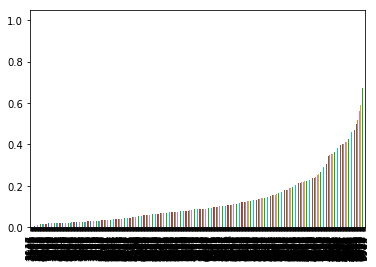

In [102]:
a['ALL'].plot.bar()

In [12]:
np.array([1,2,3])

array([1, 2, 3])

In [16]:
incomplete_columns =['PRM Source', 'Description', 'Research notes', 'Publications history', 'Primary documentation']

In [40]:

vector_book=[]
for _,i in appa.iterrows():
    vector=np.array([])
    for c in incomplete_columns:
        #print(f'{i[c]} =>>> ')
        if str(i[c])=='nan':
            
            vector=np.append(vector,0)
        else:
            vector=np.append(vector,len(i[c]))
            
    vector_book.append(vector)
    

pca = IncrementalPCA(n_components=1, whiten = False)
X_pca = pca.fit_transform(np.array(vector_book))    
appa['ALL']=X_pca
appa = appa.sort_values('ALL')
appa.drop_duplicates(keep='first',inplace = True)
    
    
    

In [43]:
np.array(vector_book)

array([[2.300e+01, 1.420e+02, 0.000e+00, 1.000e+00, 4.390e+02],
       [2.300e+01, 1.000e+01, 0.000e+00, 0.000e+00, 3.410e+02],
       [1.700e+01, 1.760e+02, 0.000e+00, 0.000e+00, 3.960e+02],
       ...,
       [3.400e+01, 2.300e+01, 0.000e+00, 0.000e+00, 7.150e+02],
       [1.400e+01, 2.160e+02, 0.000e+00, 0.000e+00, 1.578e+03],
       [1.300e+01, 1.080e+02, 0.000e+00, 0.000e+00, 1.730e+02]])

In [44]:
data = np.array(vector_book)
results = PCA(data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The PCA class was deprecated in version 2.2.
  


In [47]:
import matplotlib.pyplot as plt
plt.plot(results)

TypeError: float() argument must be a string or a number, not 'PCA'

In [48]:
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA

In [54]:
pca = IncrementalPCA(n_components=1, whiten = False)
X_pca = pca.fit_transform(np.array(vector_book))


In [57]:
a = sorted(X_pca)

In [58]:
a[0]

array([-263.71540644])

In [60]:
for i in a:
    if i//100:
        print(i)

[-263.71540644]
[-263.62821825]
[-263.10034264]
[-263.05742576]
[-262.9752333]
[-262.75475149]
[-262.69581271]
[-262.67180051]
[-262.67180051]
[-262.67180051]
[-262.66378281]
[-262.55305129]
[-262.46524289]
[-262.44010382]
[-262.39000556]
[-262.35920879]
[-262.30822761]
[-262.164184]
[-262.12593054]
[-262.03106957]
[-261.98243975]
[-261.96124292]
[-261.96124292]
[-261.91606129]
[-261.90685532]
[-261.79664965]
[-261.71756312]
[-261.71614173]
[-261.68943988]
[-261.68362817]
[-261.66793858]
[-261.59137687]
[-261.51906495]
[-261.50292306]
[-261.47260025]
[-261.46455339]
[-261.43458034]
[-261.4310082]
[-261.41981587]
[-261.40911935]
[-261.38198907]
[-261.38056768]
[-261.35084254]
[-261.30475279]
[-261.28639873]
[-261.26035752]
[-261.24141021]
[-261.24058649]
[-261.23877359]
[-261.23762927]
[-261.20488084]
[-261.19333101]
[-261.18361662]
[-261.13079004]
[-261.12101909]
[-261.11527875]
[-261.10544041]
[-261.08127685]
[-261.06576557]
[-261.04460917]
[-261.01873589]
[-260.99172956]
[-260.981033

[-252.72288427]
[-252.71820119]
[-252.71121822]
[-252.70841765]
[-252.70561707]
[-252.70516081]
[-252.70498206]
[-252.70469151]
[-252.70302221]
[-252.70193534]
[-252.696235]
[-252.69223355]
[-252.67918876]
[-252.67304563]
[-252.66671601]
[-252.6647292]
[-252.66368189]
[-252.65787239]
[-252.65702681]
[-252.65134127]
[-252.64789088]
[-252.64681661]
[-252.63550208]
[-252.63537813]
[-252.63375104]
[-252.6270392]
[-252.62697377]
[-252.62029174]
[-252.61104621]
[-252.60371877]
[-252.59771528]
[-252.59557492]
[-252.59545538]
[-252.58739372]
[-252.58664734]
[-252.57745838]
[-252.57308066]
[-252.57271321]
[-252.56856859]
[-252.56714721]
[-252.56344847]
[-252.55021895]
[-252.54750013]
[-252.54156668]
[-252.53638778]
[-252.5349538]
[-252.53246809]
[-252.51752266]
[-252.51080726]
[-252.50659304]
[-252.50355672]
[-252.50213974]
[-252.48799328]
[-252.48799328]
[-252.48057105]
[-252.47472974]
[-252.47196872]
[-252.47136331]
[-252.47071349]
[-252.4611235]
[-252.45852864]
[-252.45782888]
[-252.45412793

[-248.59660581]
[-248.59613872]
[-248.58479062]
[-248.58283342]
[-248.58017381]
[-248.57883418]
[-248.57753675]
[-248.57699387]
[-248.55277596]
[-248.54997539]
[-248.54245396]
[-248.5376783]
[-248.53489518]
[-248.53353898]
[-248.53057887]
[-248.52992464]
[-248.52661477]
[-248.52644685]
[-248.5238838]
[-248.52247457]
[-248.51250831]
[-248.50098587]
[-248.49310472]
[-248.49135368]
[-248.49035895]
[-248.48804204]
[-248.48669202]
[-248.48140354]
[-248.47686628]
[-248.47344108]
[-248.47018645]
[-248.46872066]
[-248.46168289]
[-248.46048245]
[-248.45087987]
[-248.45009085]
[-248.4482828]
[-248.4458437]
[-248.44403345]
[-248.4401564]
[-248.43292287]
[-248.42899102]
[-248.4259443]
[-248.42500217]
[-248.42217597]
[-248.42036615]
[-248.40889807]
[-248.40863756]
[-248.40863536]
[-248.40604491]
[-248.40517237]
[-248.40375098]
[-248.40067246]
[-248.38521817]
[-248.36836725]
[-248.36742997]
[-248.36576024]
[-248.36184319]
[-248.35724452]
[-248.35313172]
[-248.35270506]
[-248.34806859]
[-248.33956768

[-245.16696296]
[-245.15920886]
[-245.15908491]
[-245.1587252]
[-245.15035265]
[-245.13484136]
[-245.12621429]
[-245.12581238]
[-245.12405824]
[-245.1227365]
[-245.10910066]
[-245.0982572]
[-245.09706716]
[-245.09324446]
[-245.09299655]
[-245.06303566]
[-245.05983538]
[-245.04716731]
[-245.04457245]
[-245.03287346]
[-245.03117236]
[-245.03015465]
[-245.02955742]
[-245.02150238]
[-245.02127701]
[-245.01440584]
[-245.01423968]
[-244.98918237]
[-244.98144043]
[-244.9705804]
[-244.95903322]
[-244.95352378]
[-244.94834488]
[-244.94399897]
[-244.93172972]
[-244.92060919]
[-244.91195427]
[-244.91191693]
[-244.91000967]
[-244.90875444]
[-244.90568807]
[-244.90377087]
[-244.90327461]
[-244.90268179]
[-244.89422749]
[-244.89293824]
[-244.88739146]
[-244.8867412]
[-244.88438253]
[-244.88354136]
[-244.88138841]
[-244.87546711]
[-244.86965761]
[-244.85983628]
[-244.85433988]
[-244.83485896]
[-244.83043903]
[-244.8291416]
[-244.82751627]
[-244.81962121]
[-244.81234813]
[-244.8112142]
[-244.80662039]

[-239.60137149]
[-239.60067947]
[-239.59842907]
[-239.59764756]
[-239.59482777]
[-239.59244126]
[-239.58864641]
[-239.58406475]
[-239.57978799]
[-239.57844836]
[-239.56989265]
[-239.56530734]
[-239.56514483]
[-239.55943647]
[-239.54327519]
[-239.54258362]
[-239.54098127]
[-239.53855301]
[-239.53597295]
[-239.53506262]
[-239.52584185]
[-239.51387839]
[-239.51277893]
[-239.50463286]
[-239.50347463]
[-239.49915347]
[-239.49704227]
[-239.4939412]
[-239.49265416]
[-239.45385009]
[-239.45135178]
[-239.45111647]
[-239.44874477]
[-239.44859121]
[-239.44291008]
[-239.43372974]
[-239.42764229]
[-239.42539233]
[-239.41769259]
[-239.40421074]
[-239.39918717]
[-239.39340508]
[-239.39151483]
[-239.38882341]
[-239.37049675]
[-239.35537257]
[-239.34946608]
[-239.34191769]
[-239.33596899]
[-239.33081687]
[-239.32687526]
[-239.31736702]
[-239.3084516]
[-239.2965573]
[-239.2844542]
[-239.26582484]
[-239.26306647]
[-239.25663411]
[-239.24962418]
[-239.24515122]
[-239.23934217]
[-239.2385284]
[-239.2349540

[-231.94899216]
[-231.94817795]
[-231.9439834]
[-231.9423415]
[-231.93279106]
[-231.93186594]
[-231.93123048]
[-231.91981984]
[-231.91508418]
[-231.91355629]
[-231.89255478]
[-231.8540912]
[-231.85233895]
[-231.85163244]
[-231.83700452]
[-231.82646273]
[-231.82381323]
[-231.81722134]
[-231.80442887]
[-231.78947903]
[-231.7823447]
[-231.77073742]
[-231.75002469]
[-231.71661605]
[-231.7124215]
[-231.70778503]
[-231.68753852]
[-231.6463875]
[-231.6364652]
[-231.60933491]
[-231.5568676]
[-231.54996638]
[-231.54826969]
[-231.45933001]
[-231.45693312]
[-231.43955457]
[-231.4291486]
[-231.41661884]
[-231.3968708]
[-231.38287745]
[-231.36906551]
[-231.32533266]
[-231.32239289]
[-231.30646754]
[-231.28093695]
[-231.27561553]
[-231.26632383]
[-231.25430734]
[-231.23757861]
[-231.23450494]
[-231.21696244]
[-231.20832233]
[-231.20576967]
[-231.20564571]
[-231.2033688]
[-231.20260939]
[-231.20052603]
[-231.15504566]
[-231.13551812]
[-231.13238127]
[-231.12803933]
[-231.12694364]
[-231.11535381]
[-2

[-220.33275127]
[-220.27501248]
[-220.2670118]
[-220.25526444]
[-220.12357139]
[-220.05891922]
[-220.02290092]
[-220.01463666]
[-219.99827292]
[-219.91519312]
[-219.90985204]
[-219.89607965]
[-219.88752438]
[-219.83077149]
[-219.77450246]
[-219.7744333]
[-219.76717703]
[-219.75890986]
[-219.75724012]
[-219.74897232]
[-219.74501086]
[-219.73043951]
[-219.72496051]
[-219.72333258]
[-219.67635769]
[-219.66620185]
[-219.65930107]
[-219.65228031]
[-219.63207379]
[-219.62607074]
[-219.62135694]
[-219.60102426]
[-219.56835934]
[-219.54589248]
[-219.52766282]
[-219.49633754]
[-219.48210888]
[-219.47940487]
[-219.4566353]
[-219.44359712]
[-219.43810028]
[-219.42736421]
[-219.40353297]
[-219.39642604]
[-219.36785365]
[-219.3402644]
[-219.31350642]
[-219.28804102]
[-219.24032153]
[-219.24022718]
[-219.2372704]
[-219.17557281]
[-219.17427739]
[-219.17409442]
[-219.14726905]
[-219.14505955]
[-219.11162752]
[-219.0866771]
[-219.0733148]
[-219.0219895]
[-219.01489879]
[-218.98715427]
[-218.93743161]


[-200.65907924]
[-200.5977913]
[-200.59298183]
[-200.56022721]
[-200.5547712]
[-200.55136923]
[-200.54667577]
[-200.53956884]
[-200.50025591]
[-200.48717554]
[-200.4522441]
[-200.4119886]
[-200.4038496]
[-200.3983132]
[-200.31925319]
[-200.30893206]
[-200.2521332]
[-200.2424566]
[-200.22435765]
[-200.21956529]
[-200.14690626]
[-200.12578421]
[-200.10637545]
[-200.08490552]
[-200.08059069]
[-200.07208387]
[-200.0245975]
[-200.00401049]
[-199.97224154]
[-199.96335572]
[-199.96007149]
[-199.9589506]
[-199.90365753]
[-199.87645765]
[-199.86514136]
[-199.85940102]
[-199.85797963]
[-199.84766802]
[-199.83536142]
[-199.74422879]
[-199.74167392]
[-199.71662479]
[-199.69564439]
[-199.62456483]
[-199.56876069]
[-199.52948291]
[-199.48412296]
[-199.47407428]
[-199.41663244]
[-199.40177915]
[-199.39148455]
[-199.30991186]
[-199.2796909]
[-199.2597219]
[-199.23023472]
[-199.21956696]
[-199.21348385]
[-199.2050845]
[-199.19091473]
[-199.18742479]
[-199.18438847]
[-199.16617083]
[-199.16468262]
[-199

[-145.27756665]
[-144.99105683]
[-144.79140823]
[-144.48231873]
[-144.35819136]
[-144.04933181]
[-143.97269173]
[-143.83942814]
[-143.75966865]
[-143.5486874]
[-143.42504208]
[-143.30886032]
[-143.23100712]
[-143.09302267]
[-142.95198809]
[-142.88835145]
[-142.81414501]
[-142.7246602]
[-142.60438923]
[-142.42735451]
[-142.37889521]
[-142.35819204]
[-142.33211344]
[-142.315365]
[-142.31491094]
[-142.29412312]
[-142.25752226]
[-142.21121917]
[-142.17255028]
[-142.12078303]
[-141.98617826]
[-141.86145296]
[-141.84194359]
[-141.76009387]
[-141.72348773]
[-141.63026292]
[-141.53152488]
[-141.13127251]
[-141.06178562]
[-140.97981894]
[-140.90024563]
[-140.88684714]
[-140.59678123]
[-140.58288198]
[-140.02010724]
[-139.77756675]
[-139.7405293]
[-139.54034661]
[-139.44491626]
[-139.39715852]
[-139.32349438]
[-139.2482849]
[-139.19493627]
[-139.13964197]
[-139.06994226]
[-139.0611371]
[-138.96655997]
[-138.89478874]
[-138.62465635]
[-138.54643438]
[-138.52061491]
[-138.36851401]
[-138.34450274]

[-17.17101845]
[-17.10688209]
[-17.0966579]
[-17.01332371]
[-16.90542236]
[-16.86097454]
[-16.69400776]
[-16.63610282]
[-16.56724354]
[-16.50753563]
[-16.49642216]
[-16.46657307]
[-15.93557717]
[-15.88933522]
[-15.78662846]
[-15.54774636]
[-15.4232842]
[-15.24678605]
[-14.85739088]
[-14.80932785]
[-14.6603141]
[-14.63104173]
[-14.16866725]
[-14.05434653]
[-13.98196248]
[-13.97583128]
[-13.90908695]
[-13.8146573]
[-13.74116345]
[-13.52510401]
[-13.39566071]
[-13.37259994]
[-13.31107459]
[-13.30699433]
[-12.73064249]
[-12.64832608]
[-12.40020337]
[-12.39593921]
[-12.02607316]
[-11.97360584]
[-11.74907483]
[-11.65381352]
[-11.24522073]
[-11.15198864]
[-11.08485207]
[-10.90306274]
[-10.65339153]
[-10.6253664]
[-10.51625139]
[-10.43085692]
[-10.42517138]
[-10.39437263]
[-10.36530434]
[-10.35206401]
[-10.20108827]
[-10.17395799]
[-10.06677628]
[-9.78301906]
[-9.69604789]
[-9.49852545]
[-9.29126162]
[-9.27919511]
[-9.2253301]
[-9.22363278]
[-8.87085138]
[-8.7753647]
[-8.47844315]
[-8.47702176

[532.15216073]
[532.79742496]
[533.07947057]
[533.64512577]
[533.71139123]
[534.72358871]
[536.28562224]
[536.65258108]
[537.10493191]
[537.56912029]
[537.61051455]
[542.43595724]
[545.24567244]
[547.50994368]
[549.54658724]
[550.10326698]
[553.21443208]
[553.51026674]
[554.54828966]
[556.45502873]
[557.00610425]
[558.13002798]
[559.8375008]
[561.23949073]
[563.54034504]
[565.13339966]
[565.71414855]
[566.47691558]
[567.28761092]
[568.31049867]
[569.71871475]
[572.41134846]
[572.95164568]
[573.54992594]
[574.30075617]
[575.25480857]
[576.45292183]
[576.76723607]
[581.4819311]
[581.5025949]
[581.84137173]
[581.9859812]
[582.0721899]
[582.11032938]
[582.17879383]
[582.35028567]
[582.61546501]
[583.02512986]
[583.04645065]
[583.1924815]
[583.4320759]
[584.29973272]
[585.02278007]
[585.15626636]
[585.73470424]
[586.01561525]
[586.42067161]
[586.5199207]
[587.19618627]
[588.40188153]
[588.63801682]
[588.74831359]
[589.25424424]
[591.14495283]
[592.98916145]
[593.41152314]
[595.2491596]
[595